In [1]:
'''
Function Description：使用现有的VGG16搭建一个神经网络以实现乳腺癌分子分型的分类
'''
import tensorflow as tf 
import os
import numpy as np 
#加载训练数据
#以下是train和test的图片集合
train_data_dir = '/media/ly/liangyi/分子分型/X线MRI共有/MRI_minbox/train'
validation_data_dir = '/media/ly/liangyi/分子分型/X线MRI共有/MRI_minbox/validation'
Her2_train_data_dir = train_data_dir + '/Her_2/'
luminal_A_train_data_dir = train_data_dir + '/luminal_A/'
luminal_B_train_data_dir = train_data_dir + '/luminal_B/'
TN_train_data_dir = train_data_dir + '/TN/'

class_names = ['Her2', 'luminal_A', 'luminal_B', 'TN']

In [2]:
#加载train训练集
Her2_train_data_name = [Her2_train_data_dir + filename for filename in os.listdir(Her2_train_data_dir)]
luminal_A_train_data_name = [luminal_A_train_data_dir + filename for filename in os.listdir(luminal_A_train_data_dir)]
luminal_B_train_data_name = [luminal_B_train_data_dir + filename for filename in os.listdir(luminal_B_train_data_dir)]
TN_train_data_name = [TN_train_data_dir + filename for filename in os.listdir(TN_train_data_dir)]
train_data_name = Her2_train_data_name + luminal_A_train_data_name + luminal_B_train_data_name + TN_train_data_name

train_data_labels = [0]* len(Her2_train_data_name) + [1]*len(luminal_A_train_data_name) + [2]*len(luminal_B_train_data_name) + [3] * len(TN_train_data_name)

train_data_labels = np.array(train_data_labels)
train_data_name = np.array(train_data_name)

#train_data_name = tf.convert_to_tensor(train_data_name)
#train_data_labels = tf.convert_to_tensor(train_data_labels, dtype=tf.int64)

print(train_data_labels.shape)

(583,)


In [3]:
Her2_val_data_dir = validation_data_dir + '/Her_2/'
luminal_A_val_data_dir = validation_data_dir + '/luminal_A/'
luminal_B_val_data_dir = validation_data_dir + '/luminal_B/'
TN_val_data_dir = validation_data_dir + '/TN/'

Her2_val_data_name = [Her2_val_data_dir + filename for filename in os.listdir(Her2_val_data_dir)]
luminal_A_val_data_name = [luminal_A_val_data_dir + filename for filename in os.listdir(luminal_A_val_data_dir)]
luminal_B_val_data_name = [luminal_B_val_data_dir + filename for filename in os.listdir(luminal_B_val_data_dir)]
TN_val_data_name = [TN_val_data_dir + filename for filename in os.listdir(TN_val_data_dir)]
val_data_name = Her2_val_data_name + luminal_A_val_data_name + luminal_B_val_data_name + TN_val_data_name

val_data_labels = [0] * len(Her2_val_data_name) + [1] * len(luminal_A_val_data_name) + [2] * len(luminal_B_val_data_name) + [3] * len(TN_val_data_name)

val_data_name = np.array(val_data_name)
val_data_labels = np.array(val_data_labels)

#val_data_name = tf.convert_to_tensor(val_data_name)
#val_data_labels = tf.convert_to_tensor(val_data_labels)

In [4]:
print(val_data_name.shape, val_data_labels.shape)
print(val_data_labels[1])

(250,) (250,)
0


In [5]:
num_train_img = len(train_data_name)
train_set = np.zeros([583, 28, 28, 3], dtype =np.float32)
for i in range(num_train_img):
    img = tf.keras.preprocessing.image.load_img(train_data_name[i], target_size=[28, 28])
    train_set[i] = tf.keras.preprocessing.image.img_to_array(img)
train_set = train_set/ 255.0


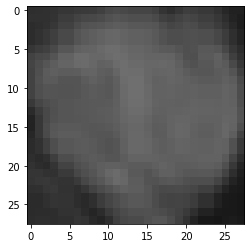

In [6]:
import matplotlib.pyplot as plt 
plt.figure()
plt.imshow(train_set[1])

In [7]:
model = tf.keras.Sequential(
[
    tf.keras.layers.Flatten(input_shape=[28, 28, 3]),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])


In [8]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    metrics=[tf.keras.metrics.sparse_categorical_accuracy]
)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2352)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               301184    
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 516       
Total params: 301,700
Trainable params: 301,700
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(train_set, train_data_labels, epochs=5)

Epoch 1/5
19/19 [==============================] - 0s 1ms/step - loss: 1.6569 - sparse_categorical_accuracy: 0.2830
Epoch 2/5
19/19 [==============================] - 0s 1ms/step - loss: 1.3321 - sparse_categorical_accuracy: 0.3756
Epoch 3/5
19/19 [==============================] - 0s 1ms/step - loss: 1.3303 - sparse_categorical_accuracy: 0.3894
Epoch 4/5
19/19 [==============================] - 0s 1ms/step - loss: 1.2638 - sparse_categorical_accuracy: 0.4443
Epoch 5/5
19/19 [==============================] - 0s 1ms/step - loss: 1.2452 - sparse_categorical_accuracy: 0.4185
